 ## Example 2: Ground-spring-mass + spring-damper-Mass system (bond-graph model simulation)
Still 1-dim system, outputs defined by code (not by user input)

In [1]:

import sys
sys.path.append("../")
from core.base import ElementFactory
from core.BondGraph2 import BondGraphModel
from rules.engine import RuleEngine
from equations.generator import EquationGenerator
from equations.statespace import CauchyFormGenerator
from equations.statespace import StateSpaceBuilder
from numerical.simulation import BondGraphSimulator


from inout.visualizer import draw_bond_graph, custom_layered_layout


In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Создаем модель
model = BondGraphModel(name='Serial 2 mass connection with 2 springs and one damper and ground connection + external force')

# Создаем элементы (имена опциональны, position по желанию)
SE_2 = ElementFactory.create('SE', name='SE_2', )
SE_3 = ElementFactory.create('SE', name='SE_3',)
SF_2 = ElementFactory.create('SF', name='SF_2', )

C_2 = ElementFactory.create('C', name='C_2', )
C_3 = ElementFactory.create('C', name='C_3', )
R_2 = ElementFactory.create('R', name='R_2', )
I_2 = ElementFactory.create('I', name='I_2',)
I_3 = ElementFactory.create('I', name='I_3', )

OneJ_4 = ElementFactory.create('1', name='1j_4')
OneJ_5 = ElementFactory.create('1', name='1j_5')
OneJ_6 = ElementFactory.create('1', name='1j_6', )
OneJ_7 = ElementFactory.create('1', name='1j_7', )
OneJ_8 = ElementFactory.create('1', name='1j_8', )

ZeroJ_2 = ElementFactory.create('0', name='0j_2',)
ZeroJ_3 = ElementFactory.create('0', name='0j_3',)

# Соединяем элементы (как в оригинале)
model.connect(SE_2, OneJ_4)
model.connect(SE_3, OneJ_5)

model.connect(I_2, OneJ_4)
model.connect(OneJ_4, ZeroJ_2)
model.connect(ZeroJ_2, OneJ_5)
model.connect(ZeroJ_2, OneJ_6)
model.connect(C_2, OneJ_6)
model.connect(R_2, OneJ_6)
model.connect(OneJ_5, I_3)
model.connect(OneJ_5, ZeroJ_3)
model.connect(OneJ_7, ZeroJ_3)
model.connect(C_3, OneJ_7)
model.connect(OneJ_8, ZeroJ_3)
model.connect(OneJ_8, SF_2)


In [4]:
# Apply causality rules
engine = RuleEngine(model, debug=False)
engine.apply_all()
# engine.assign_sources_ports()

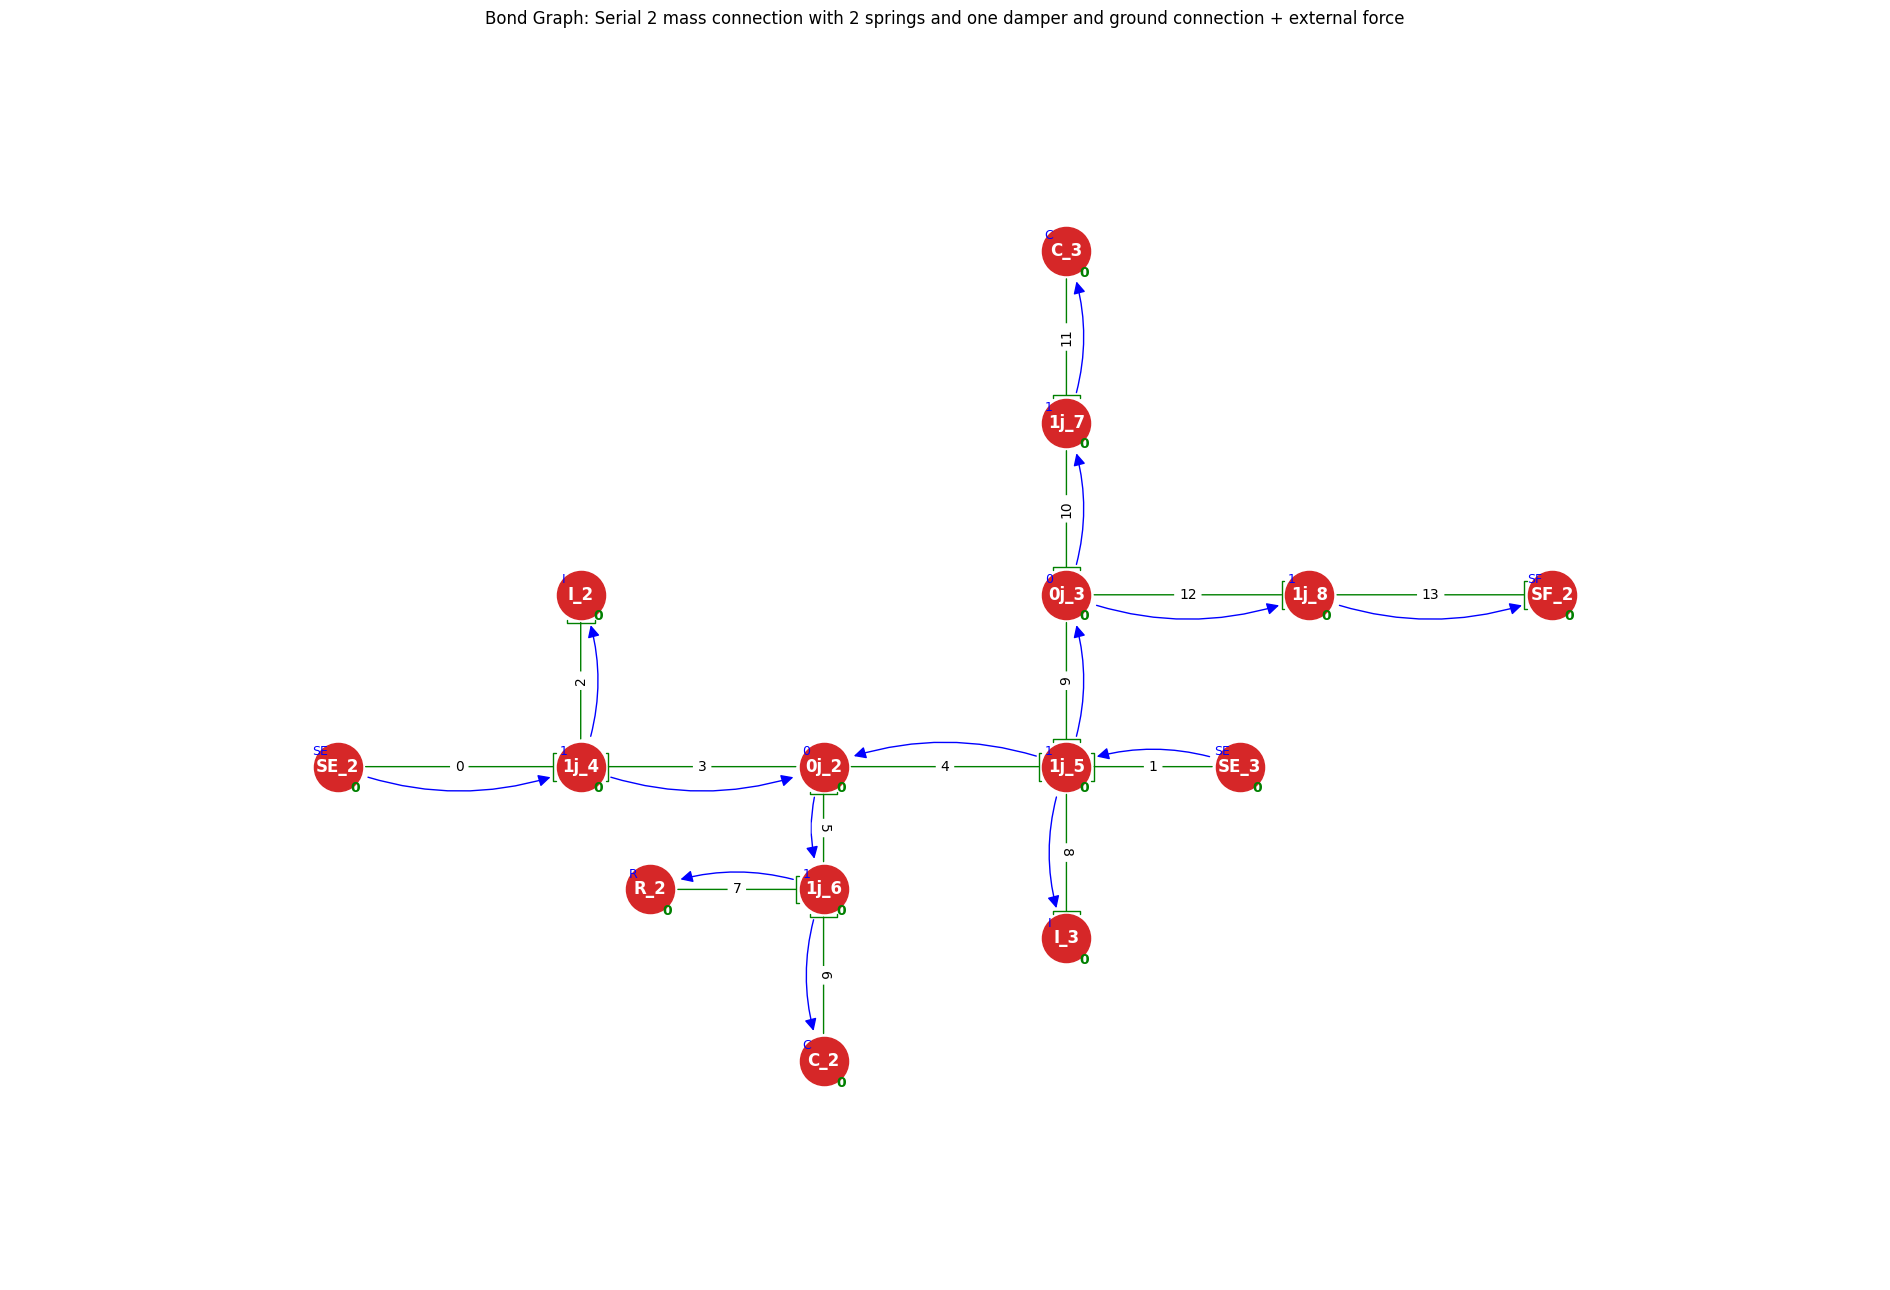

In [5]:

custom_layered_layout(model)

# Draw the graph
draw_bond_graph(model)

In [6]:
# 5) Generate equations (NOT NESS later Cochy will do it)
eqgen = EquationGenerator(model, debug=True)
eqs = eqgen.generate_equations()
# eqgen.visualize_equations()
print(eqs)


Eq(f2, f0)
Eq(f3, f0)
[1-junction] Flows equalities: [Eq(f2, f0), Eq(f3, f0)]
[1-junction] Effort sum equation: Eq(e0 - e2 - e3, 0)
Eq(f4, f1)
Eq(f8, f1)
Eq(f9, f1)
[1-junction] Flows equalities: [Eq(f4, f1), Eq(f8, f1), Eq(f9, f1)]
[1-junction] Effort sum equation: Eq(e1 - e4 - e8 - e9, 0)
[0-junction] Efforts equalities: [Eq(e4, e3), Eq(e5, e3)]
[0-junction] Flow sum equation: Eq(f3 + f4 - f5, 0)
Eq(f6, f5)
Eq(f7, f5)
[1-junction] Flows equalities: [Eq(f6, f5), Eq(f7, f5)]
[1-junction] Effort sum equation: Eq(e5 - e6 - e7, 0)
[0-junction] Efforts equalities: [Eq(e10, e9), Eq(e12, e9)]
[0-junction] Flow sum equation: Eq(-f10 - f12 + f9, 0)
Eq(f11, f10)
[1-junction] Flows equalities: [Eq(f11, f10)]
[1-junction] Effort sum equation: Eq(e10 - e11, 0)
Eq(f13, f12)
[1-junction] Flows equalities: [Eq(f13, f12)]
[1-junction] Effort sum equation: Eq(e12 - e13, 0)
[EquationGenerator] Generated equations:
   Eq(e0, SE0)
   Eq(e1, SE1)
   Eq(f2, p6/I6)
   Eq(e6, q3/C3)
   Eq(e7, R5*f7)
   Eq(f8,

In [7]:
cform = CauchyFormGenerator(model, debug=False)
eqs = cform.build_cauchy_form()

Eq(f2, f0)
Eq(f3, f0)
Eq(f4, f1)
Eq(f8, f1)
Eq(f9, f1)
Eq(f6, f5)
Eq(f7, f5)
Eq(f11, f10)
Eq(f13, f12)


In [8]:
print("User have to define the output variables for the system to make possive the output equations generation")
print(cform.get_all_ef_variables())

User have to define the output variables for the system to make possive the output equations generation
[e0, e1, e10, e11, e12, e13, e2, e3, e4, e5, e6, e7, e8, e9, f0, f1, f10, f11, f12, f13, f2, f3, f4, f5, f6, f7, f8, f9]


In [9]:
# cform.interactive_generate_output_equations()
# Instead of input we can provide variables via code
cform.generate_output_equations('e11, f11')


[Eq(e11, q4/C4), Eq(f11, -SF2 + p7/I7)]

In [10]:
print("Сauchy form equations:")
for i in cform.cauchy_equations:
    print(i)

Сauchy form equations:
Eq(dotp6, SE0 - R5*p7/I7 - R5*p6/I6 - q3/C3)
Eq(dotq3, p7/I7 + p6/I6)
Eq(dotp7, SE1 - R5*p7/I7 - R5*p6/I6 - q4/C4 - q3/C3)
Eq(dotq4, -SF2 + p7/I7)


In [11]:
print("Output equations: ")
for i in cform.output_eqs:
    print(i)

Output equations: 
Eq(e11, q4/C4)
Eq(f11, -SF2 + p7/I7)


In [12]:
print(f"System has variables:{cform.final_vars}")

System has variables:{p7, SE1, R5, C3, I6, C4, p6, SF2, SE0, I7, q4, q3}


## Make state-space eq in matrix from (A B С D)

In [13]:
ssb = StateSpaceBuilder(model, cform, debug=False)
A, B, C, D = ssb.build_state_space()

Matrix([[0, 0, 0, 0], [0, 0, 0, 0]]) Matrix([[0, 0, 0], [0, 0, 0]])


In [14]:
ssb.x_vars, ssb.u_vars

({p6, p7, q3, q4}, {SE0, SE1, SF2})

In [15]:
A, B , C, D 

(Matrix([
 [    0, -R5/I7, -R5/I6, -1/C3],
 [    0,   1/I7,   1/I6,     0],
 [-1/C4, -R5/I7, -R5/I6, -1/C3],
 [    0,   1/I7,      0,     0]]),
 Matrix([
 [ 0, 1, 0],
 [ 0, 0, 0],
 [ 0, 0, 1],
 [-1, 0, 0]]),
 Matrix([
 [1/C4,    0, 0, 0],
 [   0, 1/I7, 0, 0]]),
 Matrix([
 [ 0, 0, 0],
 [-1, 0, 0]]))

## Make numerical matrixes from symbolic

In [16]:
sim = BondGraphSimulator(model, ssb)

sim.print_simulation_requirements()  # shows the required parameters (order is important)


=== Required Data for Numerical Simulation ===
System parameters (provide param_values: dict[str, float]):
    C3, C4, I6, I7, R5
   Example: param_values = {'R1': 10.0, 'C2': 0.001, 'L3': 0.1}

State variables (provide x0: list[float], in the same order):
    q4, p7, p6, q3
   Example: x0 = [0.0, 0.0]   # (e.g., q2=0, p3=0)

Input variables (provide u_func: Callable[[float], list[float]], in the same order):
    SF2, SE0, SE1
   Example: u_func = lambda t: [1.0]   # if a single input, e.g., SE0=1 always
           u_func = lambda t: [np.sin(t)]  # sinusoidal input
-------------------------------------------------------
Full function call:
  result = sim.simulate(param_values, t_span=(0, 5), x0=x0, u_func=u_func)
  t, y = result['t'], result['y']


In [17]:
initial_state = [0.0] * len(sim.ss.x_vars) # fill zeros or define custom list as shown in DEMO 1
num_steps  = 501
input_sequence = [[0.0, 1.0] for _ in range(num_steps)] # inputs N=2 if custom
subi = [0.0]*len(sim.ss.u_vars)
input_sequence = [subi for _ in range(num_steps)] # inputs are zeros
# lets set all velocity 0 (fixed frame), and forces 1 (suppose gravity)
for ix, u in enumerate(sim.ss.u_vars):
    for i in range(num_steps):
        if str(u)[:2] == 'SE':
            input_sequence[i][ix] = 1.0


In [18]:
input_sequence

[[0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0, 1.0],
 [0.0, 1.0

In [32]:
simulation_time_to = 40 # sec
time_steps = np.linspace(0, simulation_time_to, num_steps)
sampling_period = time_steps[1] - time_steps[0] # sampling_period=0.05

In [33]:
# parameter_values = {'C3': 1/1.1, 'I2': 1.01, 'R1': 1.01} # С is complaence (not stifness K)
parameter_values = {'C3':1, 'C4':1, 'I6':1, 'I7':1, 'R5':1}
result = sim.simulate(initial_state, input_sequence, time_steps, sampling_period, parameter_values)


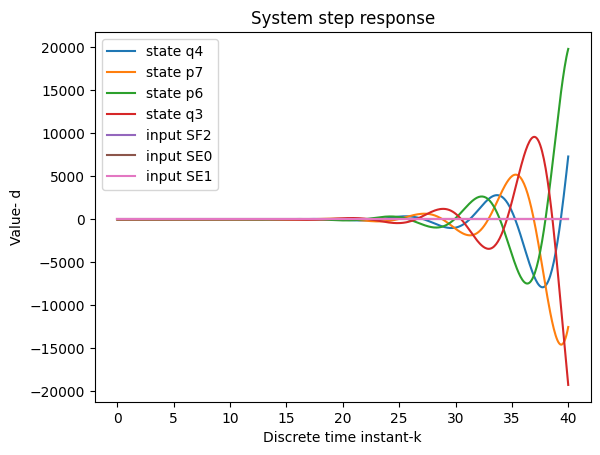

In [34]:
for ix, state_name in enumerate(sim.ss.x_vars):
    plt.plot(result['t'], result['x'][:,ix], label={"state " + str(state_name)})
    
for ix, input_name in enumerate(sim.ss.u_vars):
    plt.plot(result['t'], result['u'][:,ix], label={"input "+ str(input_name)})

plt.xlabel('Discrete time instant-k')
plt.ylabel('Value- d')

plt.title('System step response')
plt.legend()
plt.show()

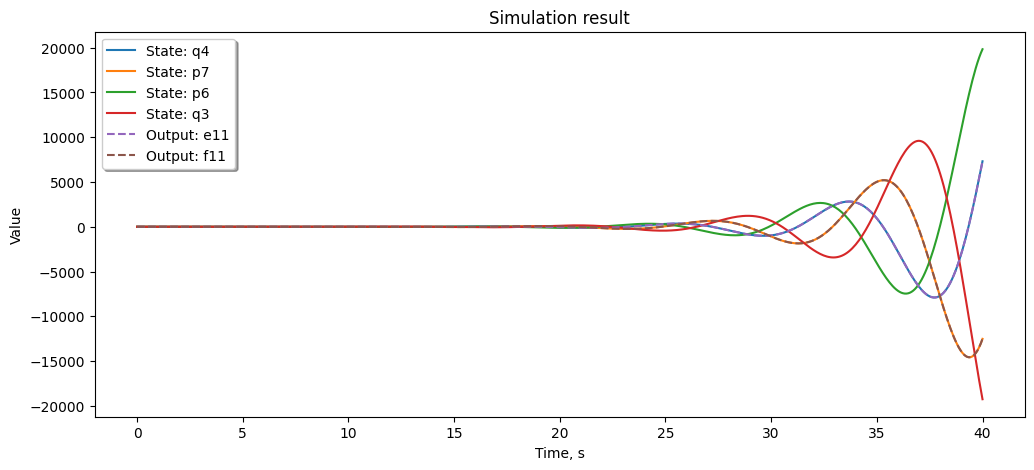

In [35]:
state_names = [str(s) for s in sim.ss.x_vars]        # ['q2', 'p3', ...]
output_names = [str(y) for y in sim.ss.output_vars]  # ['e4', 'f7', ...]

sim.plot_simulation_result(result, state_names, output_names)

AS WE CAN SEE MASS_SPRING SYSTEM BECAME STABLE OVER TIME